<a href="https://colab.research.google.com/github/kartiksharma2383/Customer-Churn-Prediction-Model-ML-Project-/blob/main/Customer_Churn_Prediction_Model_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [305]:
# Churn (stop using a company’s services or products) based on historical customer data)
# Churn Rate = (Customer lost during the period/ Total customers at the start of the period) * 100
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [306]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn(ML Project dataset).csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [307]:
df.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [308]:
df.set_index('customerID', inplace = True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [309]:
df.shape

(7043, 20)

In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [311]:
# errors='coerce': It means that if pandas encounters any values in the 'TotalCharges' column that cannot be converted to a numeric type, it will replace those values with NaN (Not a Number) instead of raising an error.
df['TotalCharges'] = df['TotalCharges'].replace(' ', pd.NA)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

In [312]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [313]:
df.dropna(subset = 'TotalCharges', axis = 0, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null 

In [314]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [315]:
df.index.duplicated().sum()

np.int64(0)

In [316]:
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [317]:
df.describe(include = 'object')

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365


In [318]:
df['Churn'].value_counts(normalize = True) * 100

,proportion
Churn,
0,73.421502
1,26.578498


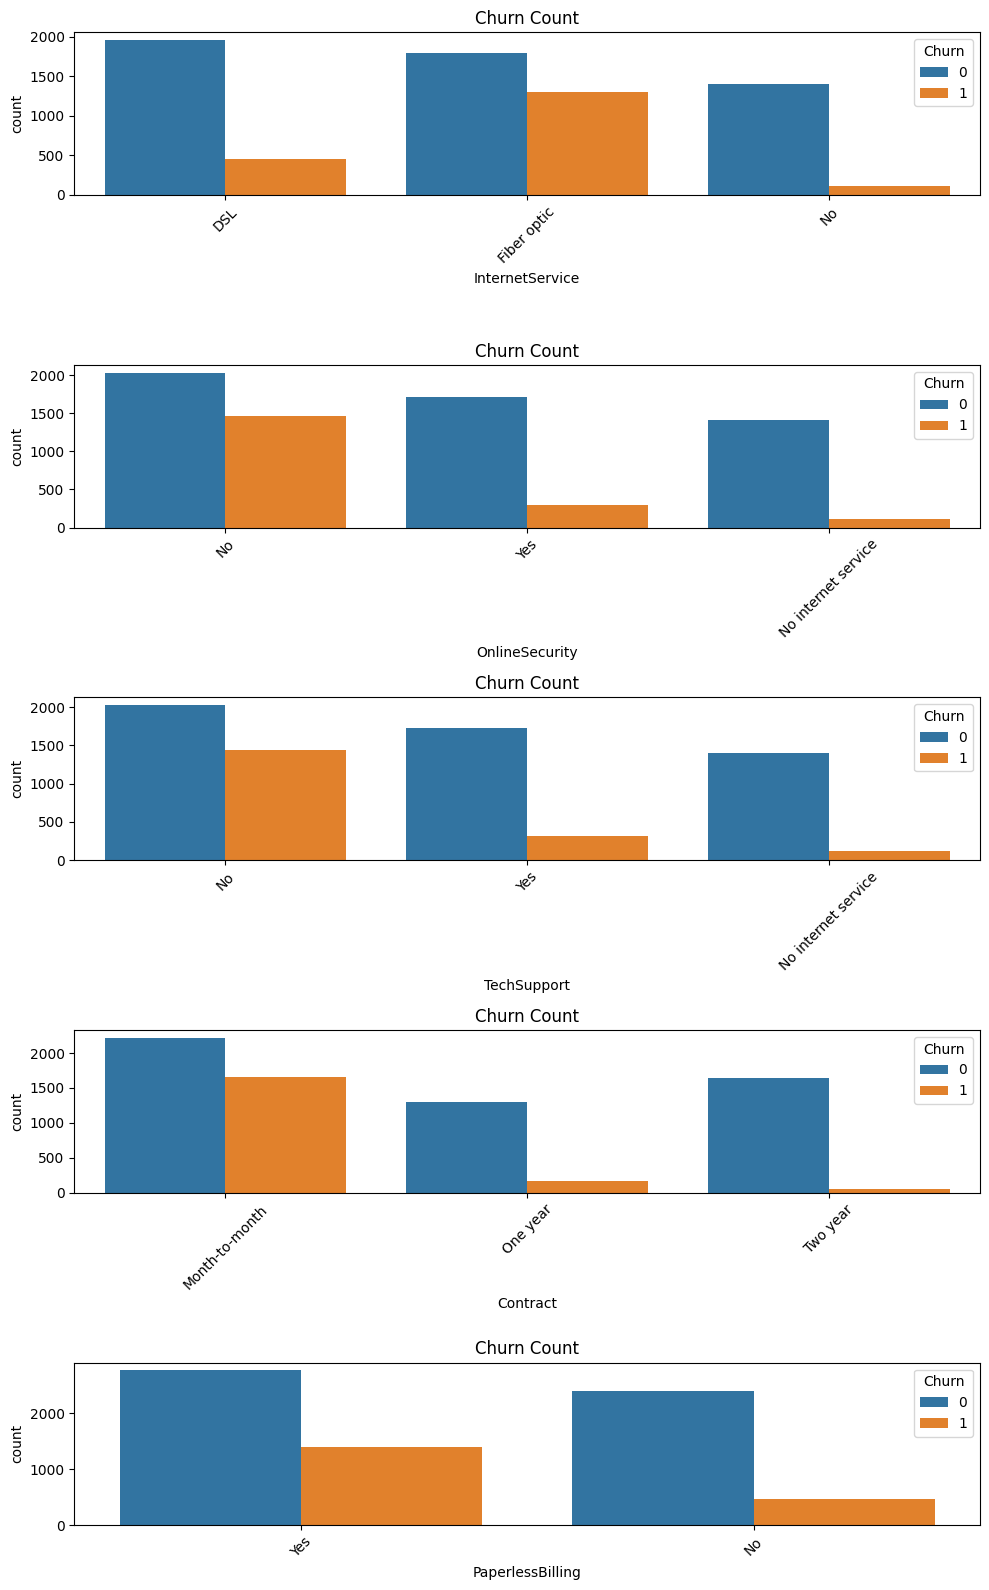

In [319]:
# enumerate() is a built-in Python function that adds a counter to an iterable (like your cat_features list), it returns both the index and the value of each item in the iterable.
# 1 as the second argument means the counting starts from 1 instead of the default 0.
# for i, col in enumerate(cat_features, 1): This loop is used to iterate through each categorical feature you want to plot.
# len(cat_features): This sets the number of rows in the grid to be equal to the number of categorical features you have.
# 1: This sets the number of columns in the grid to 1.
# i: This is the index of the current subplot.
plt.figure(figsize = (10, 16))
cat_features = [
    'InternetService', 'OnlineSecurity', 'TechSupport', 'Contract', 'PaperlessBilling']
for i, col in enumerate(cat_features, 1):
  plt.subplot(len(cat_features), 1, i)
  sns.countplot(x = col, hue = 'Churn', data = df)
  plt.xticks(rotation = 45)
  plt.title('Churn Count')
plt.tight_layout()
plt.show()

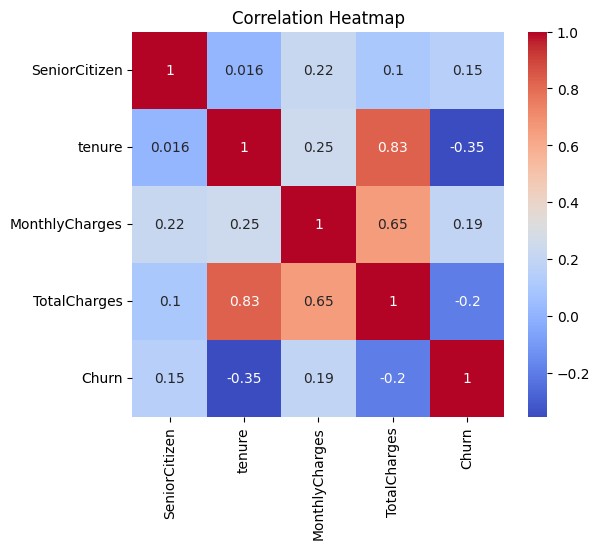

In [320]:
df_numeric = df.select_dtypes(include = ['number'])
corr = df_numeric.corr()
plt.figure(figsize = (6, 5))
sns.heatmap(corr, annot = True, cmap = 'coolwarm') # cmap = colormap
plt.title('Correlation Heatmap')
plt.show()

In [321]:
cat_cols = df.select_dtypes(include = ['object']).columns
cat_cols

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [322]:
# for col in cat_cols: This part iterates through each column name in the list cat_cols (which contains the names of your categorical columns).
binary_features = [col for col in cat_cols if df[col].nunique() == 2]
binary_features

['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

In [323]:
multi_class_features = [col for col in cat_cols if df[col].nunique() > 2]
multi_class_features

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [324]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in binary_features:
  df[col] = le.fit_transform(df[col])

In [325]:
df[binary_features].head()

,gender,Partner,Dependents,PhoneService,PaperlessBilling
customerID,,,,,
7590-VHVEG,0,1,0,0,1
5575-GNVDE,1,0,0,1,0
3668-QPYBK,1,0,0,1,1
7795-CFOCW,1,0,0,0,0
9237-HQITU,0,0,0,1,1


In [326]:
# pd.get_dummies(): It creates new binary columns for each unique value in the specified categorical columns
df = pd.get_dummies(df, columns = multi_class_features)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,0,...,True,False,False,True,False,False,False,False,True,False
5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,0,...,True,False,False,False,True,False,False,False,False,True
3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,1,...,True,False,False,True,False,False,False,False,False,True
7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,True,False,True,False,False,False
9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,1,...,True,False,False,True,False,False,False,False,True,False


In [327]:
# bool_cols: boolean data type columns
bool_cols = df.select_dtypes(include = ['bool']).columns
df[bool_cols] = df[bool_cols].astype('int')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


In [328]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_cols = ['tenure', 'TotalCharges', 'MonthlyCharges']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df[numeric_cols]

,tenure,TotalCharges,MonthlyCharges
customerID,,,
7590-VHVEG,-1.280248,-0.994194,-1.161694
5575-GNVDE,0.064303,-0.173740,-0.260878
3668-QPYBK,-1.239504,-0.959649,-0.363923
7795-CFOCW,0.512486,-0.195248,-0.747850
9237-HQITU,-1.239504,-0.940457,0.196178
...,...,...,...
6840-RESVB,-0.343137,-0.129180,0.664868
2234-XADUH,1.612573,2.241056,1.276493
4801-JZAZL,-0.872808,-0.854514,-1.170004


In [329]:
y = df['Churn']
x = df.drop('Churn', axis = 1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [330]:
# The imblearn.over_sampling library, and specifically SMOTE is used in the machine learning topic of handling imbalanced datasets.
# x_train_resampled: DataFrame containing the features for my training data after applying SMOTE oversampling.
# y_train_resampled: Series containing the target variable ('Churn') for your training data after applying SMOTE oversampling.
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [331]:
# y_train_resampled.value_counts(): Calculates and displays the number of occurrences of each unique value (0 for 'No Churn' and 1 for 'Churn') in the y_train_resampled dataset.
y_train_resampled.value_counts()

,count
Churn,
1,4130
0,4130


In [332]:
# we can't use linear regression and K Means for churn dataset bcz linear regression used to predict continuous values, k means used for grouping data and the churn dataset is in categorical and predict target vairable not for grouping data.
# percision_score: Precision is a metric used in classification to evaluate the accuracy of the positive predictions made by a model.
# recall_score: True positive rate or used to evaluate the model's ability to find all the positive instances in the dataset.
# F1-score: Metric used to evaluate the performance of a classification model.
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances_argmin, classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier

In [333]:
model = {
    'Logistic Regression': LogisticRegression(solver = 'liblinear', random_state = 42),
    'Decision Tree': DecisionTreeClassifier(random_state = 42),
    'Random Forest': RandomForestClassifier(random_state = 42),
    'XGBoost': XGBClassifier(random_state = 42),
    'Support Vector Machine': SVC(random_state = 42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(random_state = 42),
}

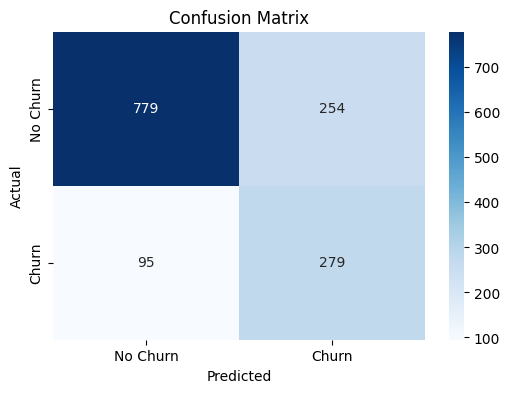

In [334]:
# fmt='d': It ensures that counts are displayed as integers without any decimal places.
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [335]:
model_performance = {}
for name, ml_model in model.items():
  pipe = Pipeline([
      ('scaler', StandardScaler()),
      ('model', ml_model)
  ])
  pipe.fit(x_train_resampled, y_train_resampled)
  y_pred = pipe.predict(x_test)
  report = classification_report(y_test, y_pred, output_dict=True)
  model_performance[name] = report['weighted avg']['f1-score']
  print(f'Model: {name}')
  print(classification_report(y_test, y_pred))

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1033
           1       0.57      0.68      0.62       374

    accuracy                           0.78      1407
   macro avg       0.72      0.75      0.73      1407
weighted avg       0.79      0.78      0.78      1407

Model: Decision Tree
              precision    recall  f1-score   support

           0       0.83      0.77      0.80      1033
           1       0.47      0.56      0.51       374

    accuracy                           0.72      1407
   macro avg       0.65      0.67      0.66      1407
weighted avg       0.73      0.72      0.72      1407

Model: Random Forest
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1033
           1       0.54      0.59      0.56       374

    accuracy                           0.76      1407
   macro avg       0.69      0.70      0.70      1407
weigh

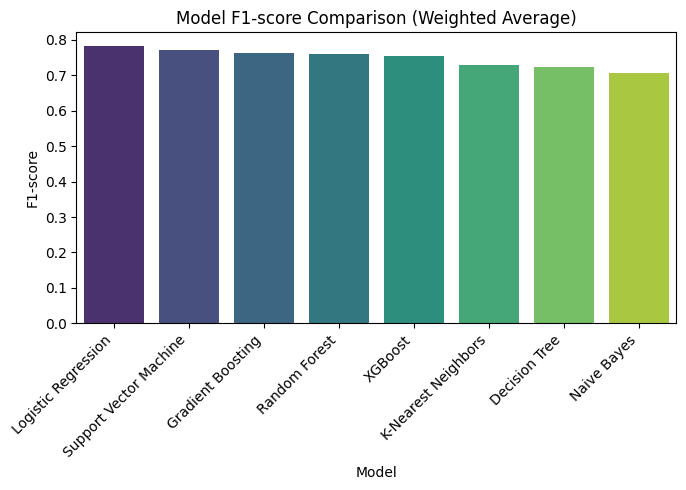

In [346]:
# Create a DataFrame from the performance dictionary for easier plotting
# orient='index': Used to tells pandas that the keys of the dictionary should be used as the DataFrame's index
performance_df = pd.DataFrame.from_dict(model_performance, orient='index', columns=['F1-score'])
performance_df = performance_df.sort_values(by='F1-score', ascending=False)
plt.figure(figsize=(7, 5))

sns.barplot(x = performance_df.index, y = performance_df['F1-score'], palette ='viridis') # palette ='viridis': color of bar palette
plt.title('Model F1-score Comparison (Weighted Average)')
plt.xlabel('Model')
plt.ylabel('F1-score')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()